<a href="https://colab.research.google.com/github/mohamedb93/Predictive_Analysis_Data_2024/blob/main/Group_Project_Checkpoint_III_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [ ]:
# Load the dataset
from google.colab import files


uploaded = files.upload()

Saving LoanData_Preprocessed_v1.2.csv to LoanData_Preprocessed_v1.2 (1).csv


In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Tuition_Assistance_20240525.csv to Tuition_Assistance_20240525 (1).csv


In [ ]:
loans_df = pd.read_csv('LoanData_Preprocessed_v1.2.csv')
tuition_df = pd.read_csv('Tuition_Assistance_20240525.csv')

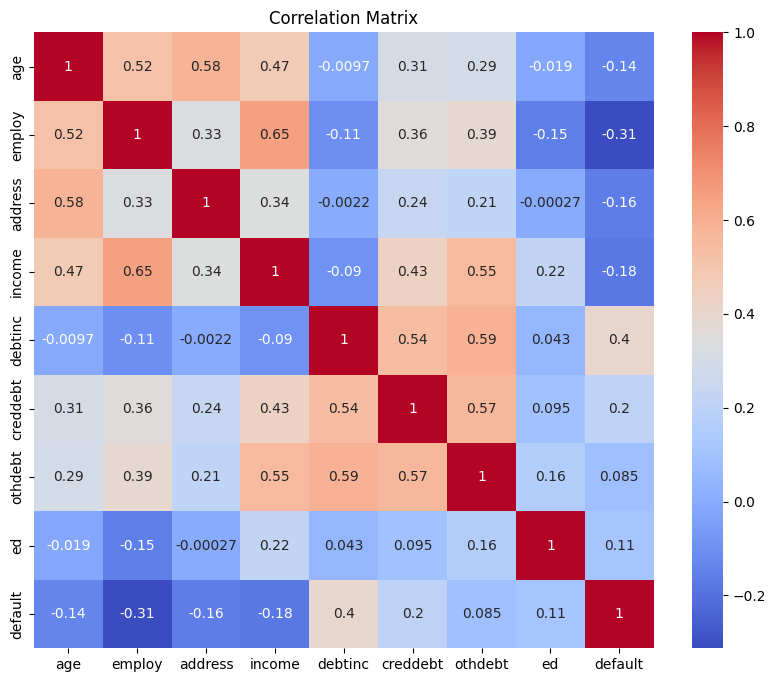

LogisticRegression(max_iter=1000)

In [ ]:
# Step 1: Correlation Analysis
correlation_matrix = loans_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Step 2: Logistic Regression
# Define features and target variable
X = loans_df.drop(columns=['default'])
y = loans_df['default']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89        70
           1       0.82      0.52      0.64        27

    accuracy                           0.84        97
   macro avg       0.83      0.74      0.76        97
weighted avg       0.83      0.84      0.82        97

Confusion Matrix:
[[67  3]
 [13 14]]


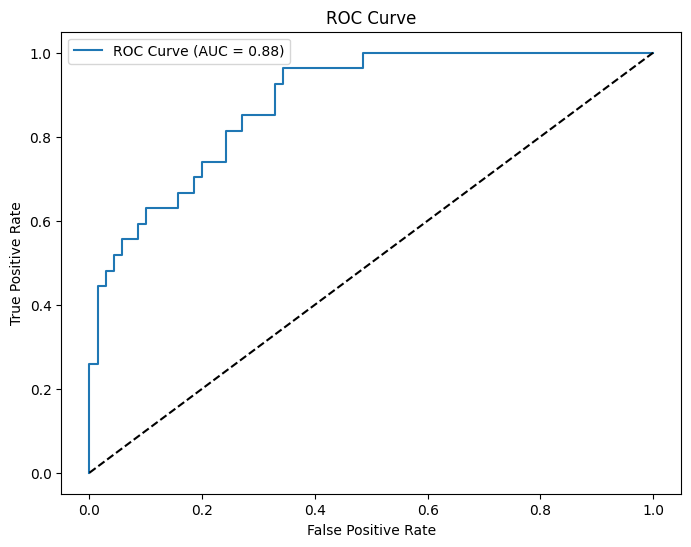

In [ ]:
# Predict and evaluate the model
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


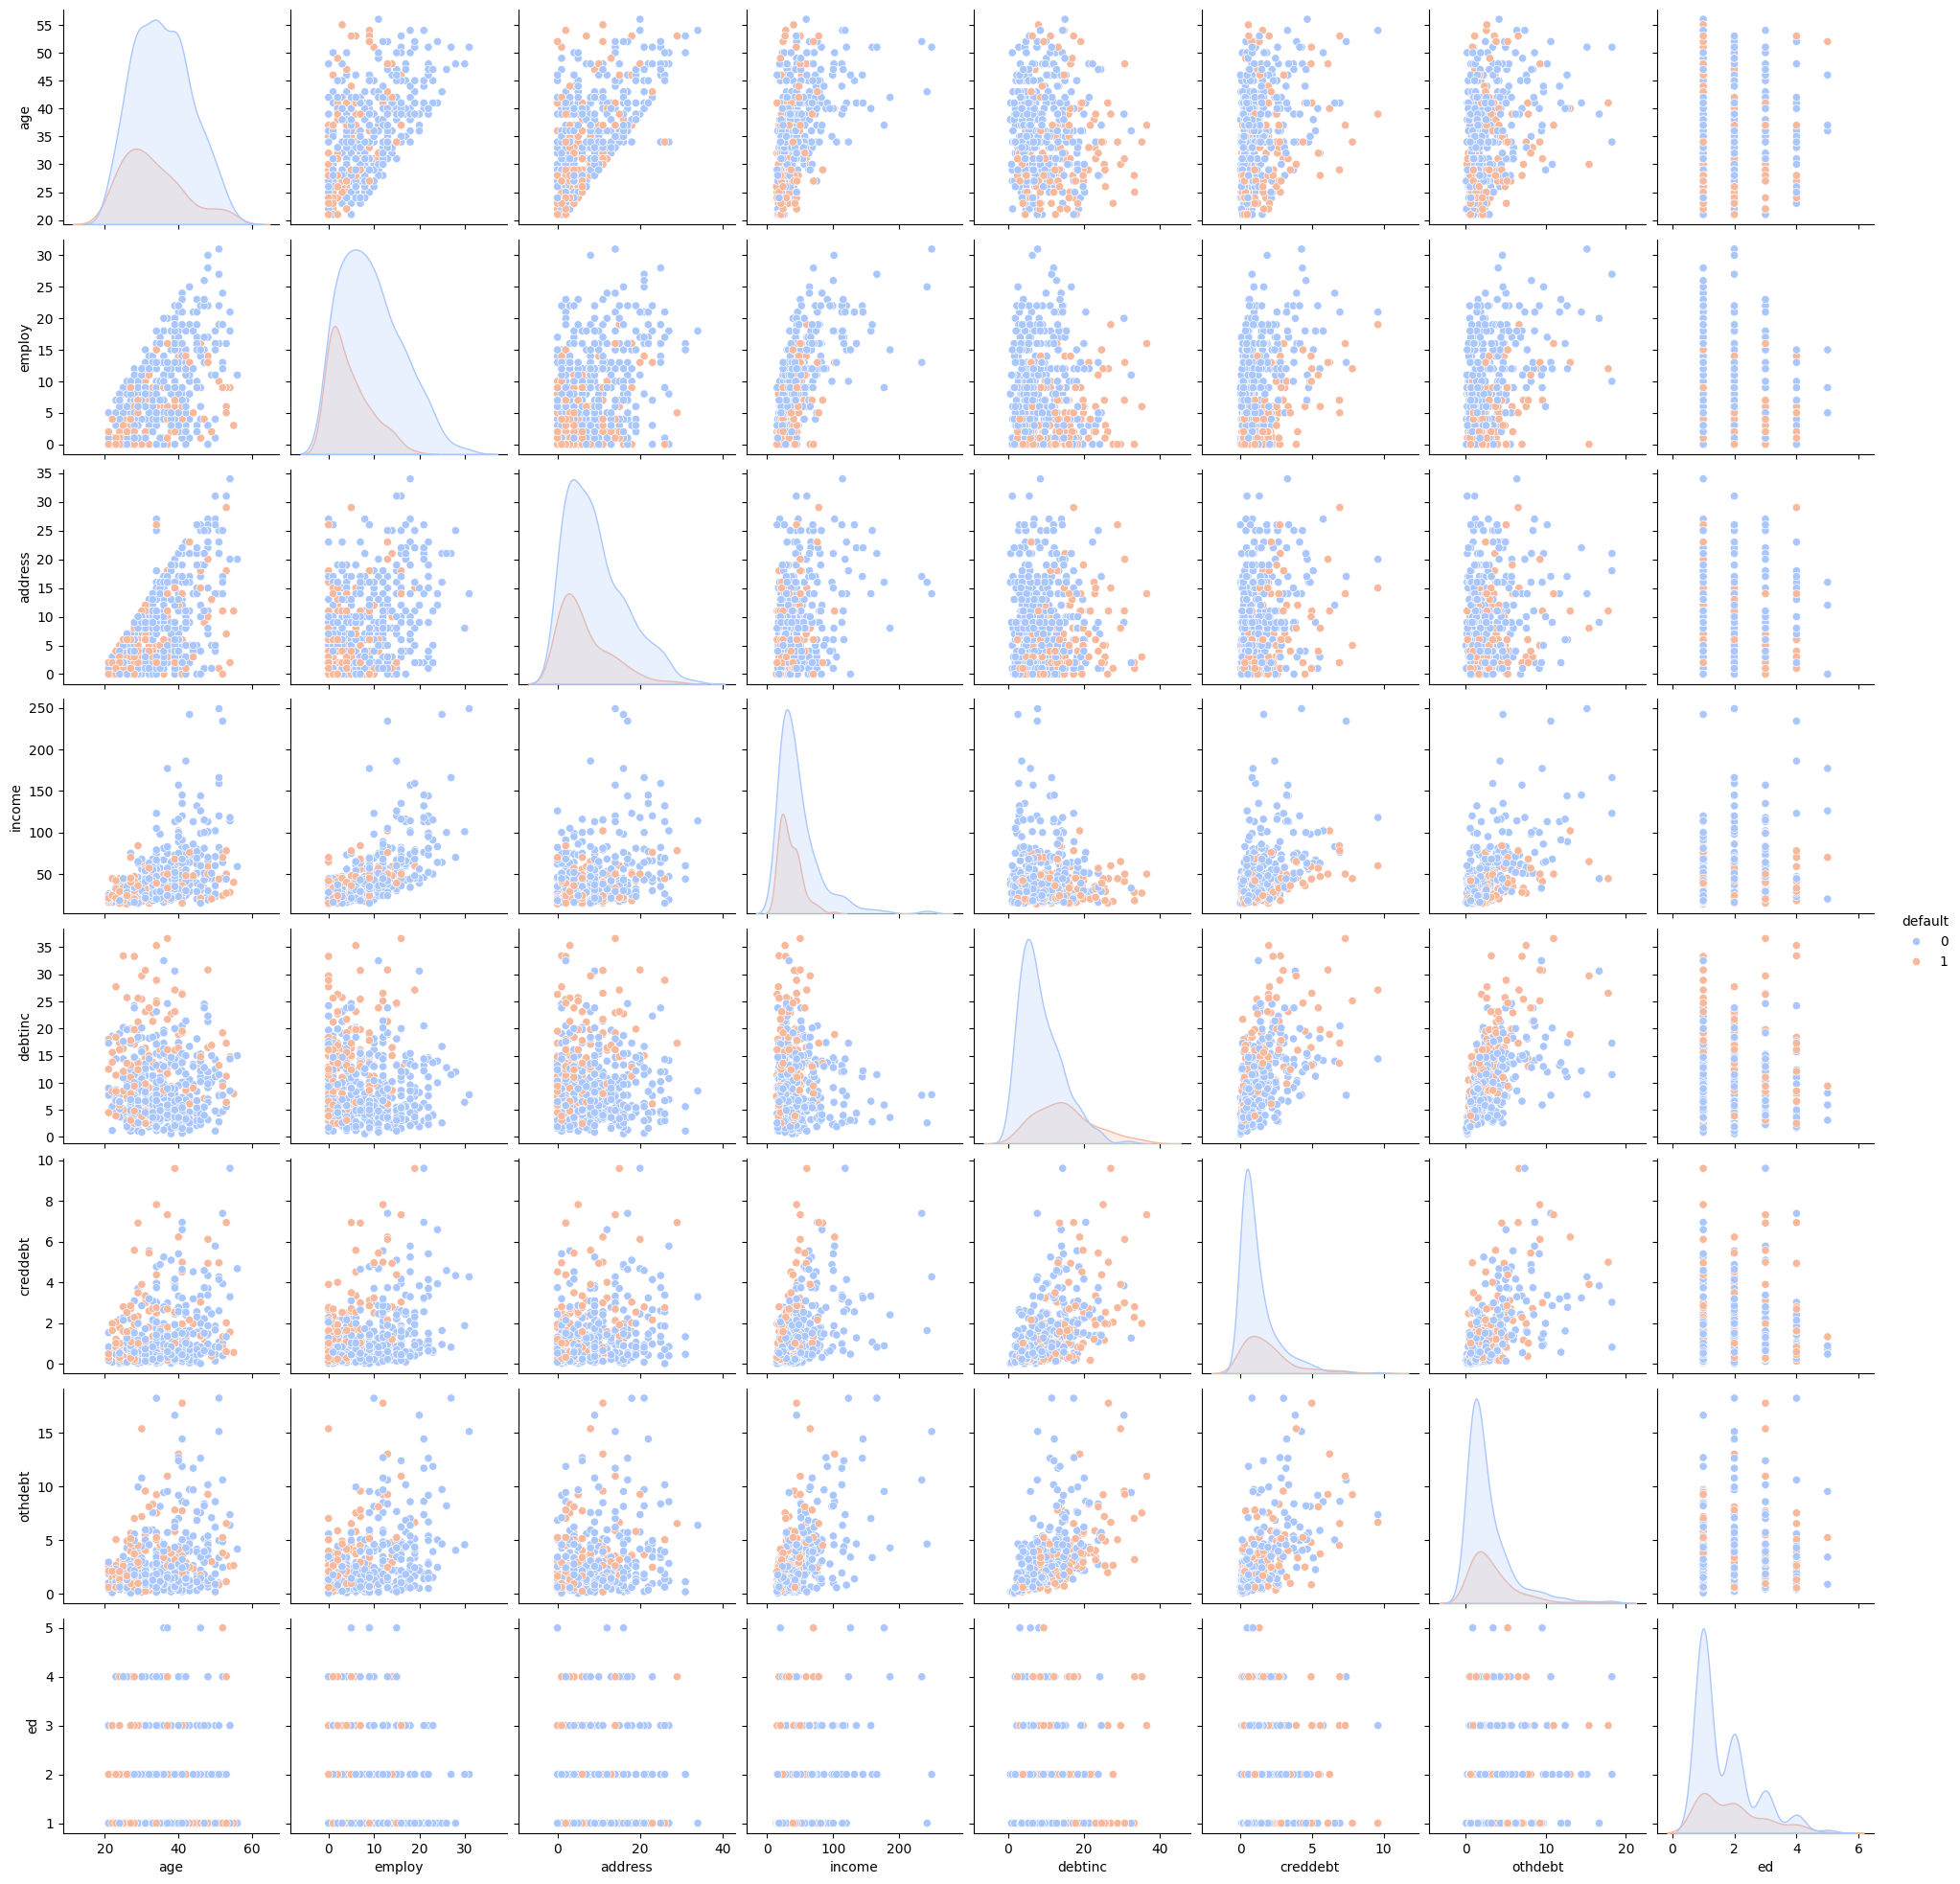

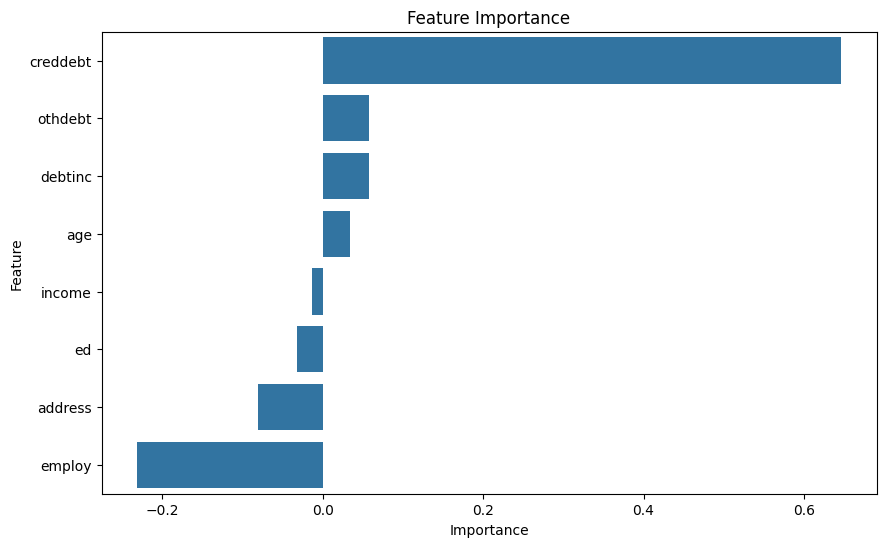

In [ ]:
# Step 3: Visualizations
# Pairplot to see relationships between features and the target variable
sns.pairplot(loans_df, hue='default', palette='coolwarm')
plt.show()

# Feature importance from logistic regression coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()